# Random forest

Random Forest is a powerful ensemble machine learning algorithm that is widely used for both classification and regression tasks. It is based on the concept of decision trees and combines multiple decision trees to make more accurate and robust predictions. Random Forest was developed by Leo Breiman and Adele Cutler and has become a popular choice in various applications due to its ability to handle complex datasets and reduce overfitting.



## Problem Statement 1: (Company_data)
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


### Importing libraries

In [51]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [52]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Random forest assignment

18-01-2023  20:47    <DIR>          .
18-01-2023  20:47    <DIR>          ..
18-01-2023  20:29    <DIR>          .ipynb_checkpoints
18-01-2023  20:47           236,341 Assignment no. 15.ipynb
12-12-2022  14:32            17,023 Company_Data.csv
12-12-2022  14:32            21,837 Fraud_check.csv
12-12-2022  14:32             1,378 problem statement(company data).txt
12-12-2022  14:32               133 Problem_statement(Fraudcheck).txt
               5 File(s)        276,712 bytes
               3 Dir(s)  116,820,926,464 bytes free


### Reading File

In [53]:
# Reading csv file
company = pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA

In [54]:
# Measuring shape of company data
company.shape

(400, 11)

In [55]:
# Describing data
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [56]:
# file information
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [57]:
# company value counts
company.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

In [58]:
# Value counts of sales
company['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [59]:
# value counts of shelveloc
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [60]:
# value counts of urban
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [61]:
#value counts of us
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

### Visualization

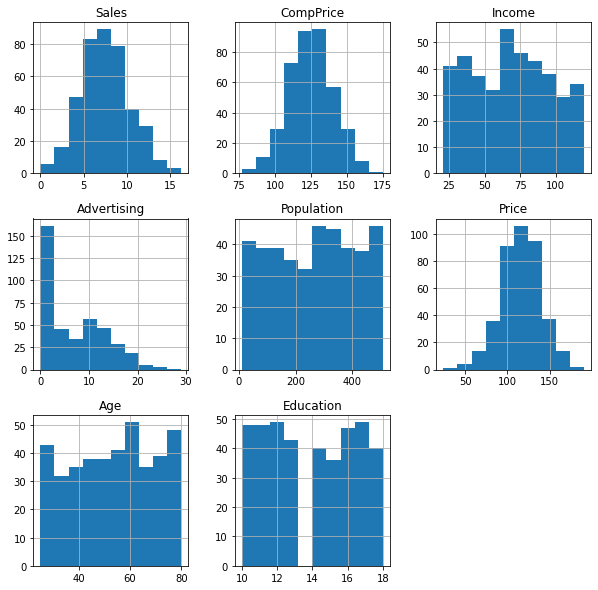

In [63]:
# Histogram
company.hist(figsize=(10,10))
plt.show()

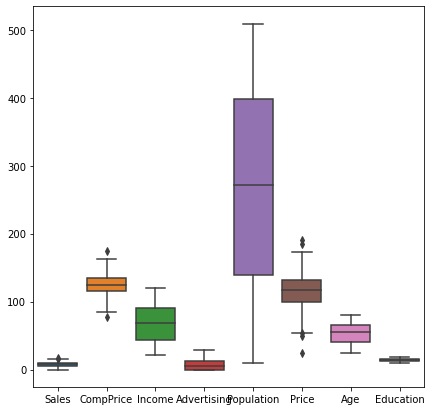

In [65]:
# Boxplot
plt.figure(figsize=(7,7))
sns.boxplot(data=company)
plt.show()

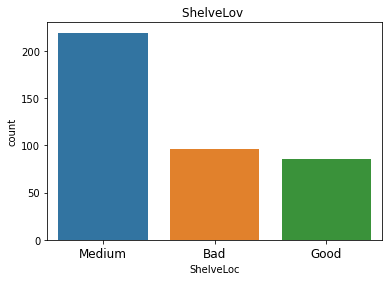

In [71]:
# Countplot for ShelveLoc
sns.countplot(x='ShelveLoc', data=company, 
              order=company['ShelveLoc'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('ShelveLov ')
plt.show()

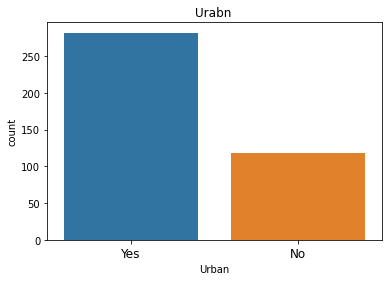

In [72]:
# Countplot for Urban
sns.countplot(x='Urban', data=company, 
              order=company['Urban'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Urabn ')
plt.show()

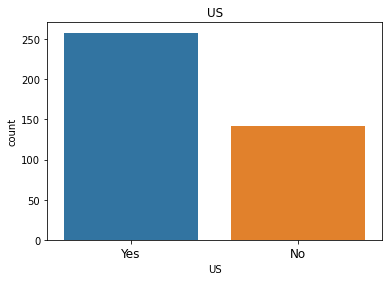

In [73]:
# Count plot for US
sns.countplot(x='US', data=company, 
              order=company['US'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('US')
plt.show()

### Data Engineering

In [12]:
bins = np.linspace(min(company['Sales']), max(company['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [13]:
# Converting sales into low, medium and high category
label_names = ['Low', 'Medium', 'High']
company['Sales_bin'] = pd.cut(company['Sales'], bins, labels=label_names, include_lowest=True )
company[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [14]:
# Dropping Sales column
company.drop(['Sales'],axis=1,inplace=True)

In [15]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


### Using Label Encoder

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
# Applying label encoder 
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales_bin']=label_encoder.fit_transform(company['Sales_bin'])

In [19]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


### Splitting training and testing data

In [20]:
# Splitting Input and Output values
X = company.iloc[:,:-1]
Y = company.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=30)

In [22]:
x_train.shape,x_train.shape

((300, 10), (300, 10))

In [23]:
y_train.shape,y_test.shape

((300,), (100,))

# Random Forest Classifier

In [25]:
num_trees = 100
max_features = 6

first_model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(first_model, X, Y, cv=10)
print('Accuracy is:',results.mean())


Accuracy is: 0.72


In [26]:
# Fitting the first_model
first_model.fit(x_train,y_train)
first_model.feature_importances_

array([0.13089436, 0.11362094, 0.07350785, 0.09990856, 0.22354344,
       0.14557746, 0.11945732, 0.05887825, 0.0187538 , 0.01585804])

In [27]:
# predicting x test data
x_pred = first_model.predict(x_test)
pd.Series(x_pred).value_counts()

2    73
1    15
0    12
dtype: int64

### Checking effect of features

In [28]:
cols=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban','US']
imp_feature=pd.Series(first_model.feature_importances_,index=cols).sort_values(ascending=False)
imp_feature

Price          0.223543
ShelveLoc      0.145577
CompPrice      0.130894
Age            0.119457
Income         0.113621
Population     0.099909
Advertising    0.073508
Education      0.058878
Urban          0.018754
US             0.015858
dtype: float64

### Visualization

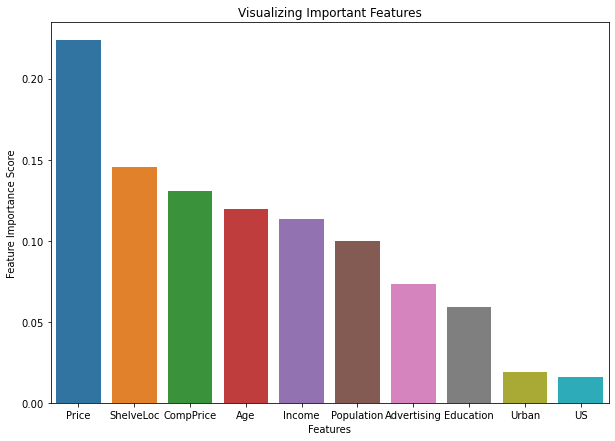

In [29]:
# Plotting bar plot
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(y=imp_feature,x=imp_feature.index)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

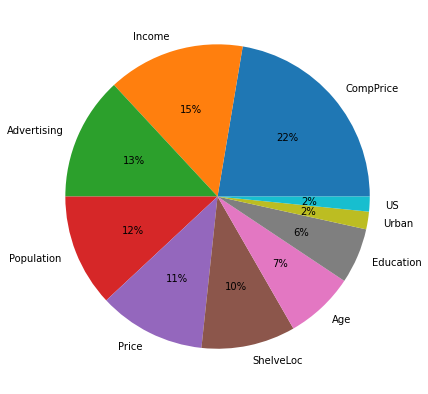

In [30]:
plt.figure(figsize=(10,7))
plt.pie(imp_feature,labels=cols,autopct='%1.0f%%')
plt.show()

In [31]:
# Correlation 
corr=company.corr()
corr.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,-0.011509
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,-0.039131
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.000816
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.025202
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,0.088405


<AxesSubplot:>

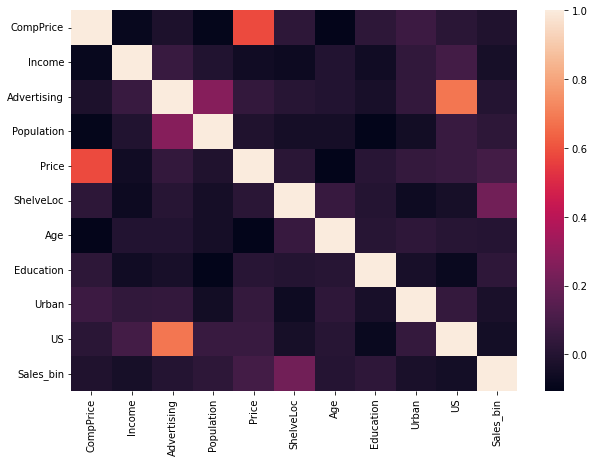

In [32]:
# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr)

### Accuracy

In [34]:
# Checking accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,x_pred))
print('='*60)
print('Accuracy score is:',metrics.accuracy_score(y_test,x_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.73      0.50      0.59        22
           2       0.78      0.85      0.81        67

    accuracy                           0.74       100
   macro avg       0.67      0.63      0.64       100
weighted avg       0.74      0.74      0.73       100

Accuracy score is: 0.74


In [35]:
#calculating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,x_pred)

array([[ 6,  0,  5],
       [ 0, 11, 11],
       [ 6,  4, 57]], dtype=int64)

## Problem statement 2: (Fraud_check)
    
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [164]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Random forest assignment

15-01-2023  18:09    <DIR>          .
15-01-2023  18:09    <DIR>          ..
15-01-2023  17:40    <DIR>          .ipynb_checkpoints
12-12-2022  14:32            17,023 Company_Data.csv
12-12-2022  14:32            21,837 Fraud_check.csv
12-12-2022  14:32             1,378 problem statement(company data).txt
12-12-2022  14:32               133 Problem_statement(Fraudcheck).txt
15-01-2023  18:09           116,398 Random forest .ipynb
               5 File(s)        156,769 bytes
               3 Dir(s)  129,463,730,176 bytes free


In [74]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### EDA

In [75]:
fraud.shape

(600, 6)

In [76]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [77]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [78]:
fraud.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [79]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [80]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [81]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

### Feature Engineering

In [86]:
fraud['Fraud_Check'] = pd.cut(fraud['Taxable.Income'], bins=[0, 30000, 1000000], labels=['Risk', 'Good'])

In [87]:
fraud['Fraud_Check'].value_counts()

Good    476
Risk    124
Name: Fraud_Check, dtype: int64

In [88]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


### Applying Label Encoder

In [89]:
label_encoder = preprocessing.LabelEncoder()

In [90]:
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])
fraud['Fraud_Check']=label_encoder.fit_transform(fraud['Fraud_Check'])

In [91]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


### Splitting training testing data

In [92]:
X = fraud.iloc[:,:-1]
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [93]:
Y = fraud.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraud_Check, Length: 600, dtype: int32

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [95]:
X_train.shape,X_test.shape

((402, 6), (198, 6))

In [96]:
y_train.shape,y_test.shape

((402,), (198,))

## Random Forest Classification

In [100]:
num_trees = 100
max_features = 4
first_model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.5,max_features=max_features,random_state=8)
results = cross_val_score(first_model, X, Y, cv=10)
print('Accuracy is:',results.mean())


Accuracy is: 0.9983333333333334


In [101]:
# fitting model
first_model.fit(X_train,y_train)
first_model.feature_importances_

array([1.98092393e-03, 2.88918765e-03, 9.73483048e-01, 1.07518510e-02,
       1.00569840e-02, 8.38005056e-04])

In [102]:
# Predicting model
y_pred = first_model.predict(X_test)
pd.Series(y_pred).value_counts()

0    158
1     40
dtype: int64

### Checking Effect of features

In [103]:
names=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience","Urban"]
imp_feature=pd.Series(first_model.feature_importances_,index=names).sort_values(ascending=False)
imp_feature

Taxable.Income     0.973483
City.Population    0.010752
Work.Experience    0.010057
Marital.Status     0.002889
Undergrad          0.001981
Urban              0.000838
dtype: float64

Most effective feature is Taxable.Income

### Visualization

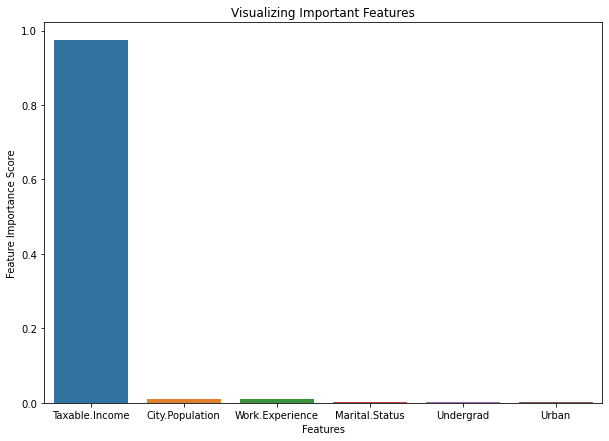

In [104]:
# Plotting bar plot
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(y=imp_feature,x=imp_feature.index)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

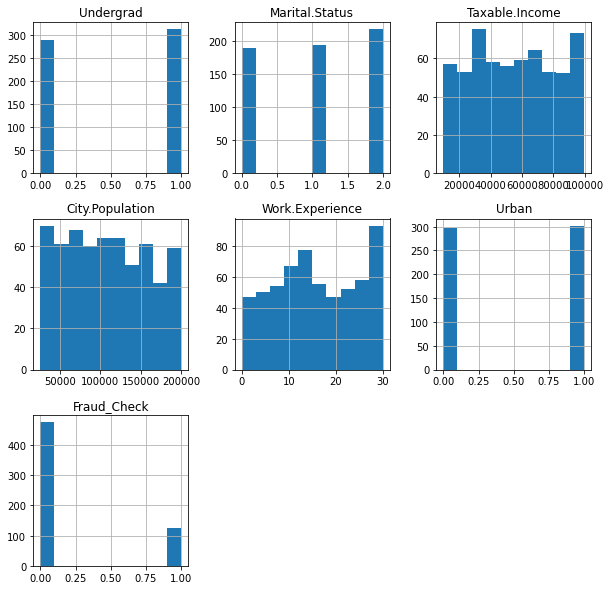

In [105]:
fraud.hist(figsize=(10,10))
plt.show()

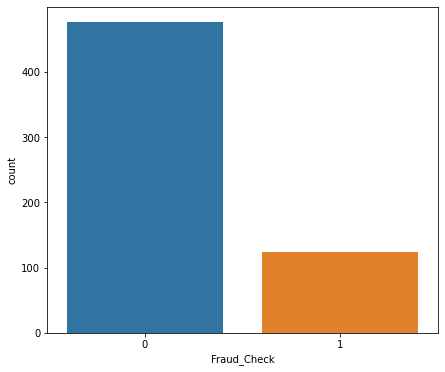

In [106]:
import warnings
warnings.filterwarnings('ignore')
# Plotting counterplot
plt.figure(figsize=(7,6))
sns.countplot(fraud['Fraud_Check'])
plt.show()

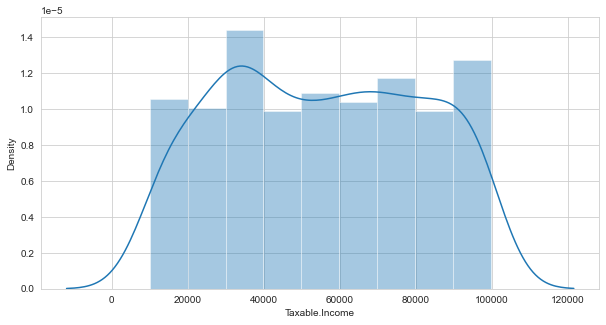

In [107]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(fraud['Taxable.Income'])
plt.show()

In [108]:
# Correlation
corr=fraud.corr()
corr.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_Check
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972


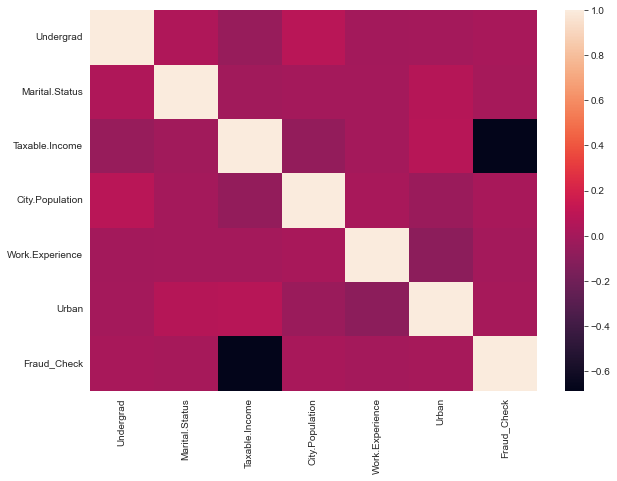

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(corr)
plt.show()

### Accuracy

In [113]:
print(classification_report(y_test,y_pred))
print('='*60)
print('Accuracy is :',metrics.accuracy_score(y_test,y_pred))
print('='*60)
print('Confusion Matrix :',confusion_matrix(y_test,y_pred))
print('='*60)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       157
           1       1.00      0.98      0.99        41

    accuracy                           0.99       198
   macro avg       1.00      0.99      0.99       198
weighted avg       0.99      0.99      0.99       198

Accuracy is : 0.9949494949494949
Confusion Matrix : [[157   0]
 [  1  40]]
